In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('inputs/img.png', cv2.IMREAD_COLOR)

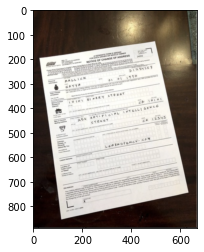

In [3]:
plt.imshow(img[:,:,::-1])
plt.show()

In [4]:
orig_img = img.copy()

# Morphology to get blank page

In [5]:
kernel = np.ones((5,5),np.uint8)

img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations= 5)

In [6]:
con = np.zeros_like(img)
canny = cv2.Canny(img, 100, 500)
contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = sorted(contours, key=cv2.contourArea, reverse=True)[0]
cv2.drawContours(con, cnt, -1, (0, 255, 255), 3)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

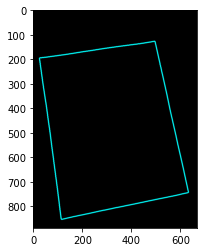

In [7]:
plt.imshow(con, cmap='gray')
plt.show()

[[26, 195], [496, 127], [115, 852], [633, 742]]


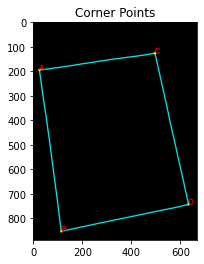

In [8]:
epsilon = 0.02 * cv2.arcLength(cnt, True)
approx_corners = cv2.approxPolyDP(cnt, epsilon, True)
cv2.drawContours(con, approx_corners, -1, (255, 255, 0), 10)
approx_corners = sorted(np.concatenate(approx_corners).tolist())

for index, c in enumerate(approx_corners):
    character = chr(65 + index)
    cv2.putText(con, character, tuple(c), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

# Rearranging the order of the corner points
corners = [approx_corners[i] for i in [0, 2, 1, 3]]
print(corners)
plt.imshow(con)
plt.title('Corner Points')
plt.show()

In [9]:
w1 = np.sqrt((corners[0][0] - corners[1][0]) ** 2 + (corners[0][1] - corners[1][1]) ** 2)
w2 = np.sqrt((corners[2][0] - corners[3][0]) ** 2 + (corners[2][1] - corners[3][1]) ** 2)
w = max(int(w1), int(w2))

h1 = np.sqrt((corners[0][0] - corners[2][0]) ** 2 + (corners[0][1] - corners[2][1]) ** 2)
h2 = np.sqrt((corners[1][0] - corners[3][0]) ** 2 + (corners[1][1] - corners[3][1]) ** 2)
h = max(int(h1), int(h2))

destination_corners = [[0, 0], [w - 1, 0], [0, h - 1], [w - 1, h - 1]]
print(destination_corners)

[[0, 0], [528, 0], [0, 662], [528, 662]]


In [10]:
h, w = orig_img.shape[:2]
homography, mask = cv2.findHomography(np.float32(corners), np.float32(destination_corners), method=cv2.RANSAC, ransacReprojThreshold=3.0)
un_warped = cv2.warpPerspective(orig_img, np.float32(homography), (w, h), flags=cv2.INTER_LINEAR)

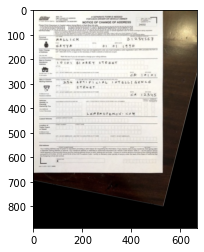

In [11]:
plt.imshow(un_warped[:,:,::-1])
plt.show()

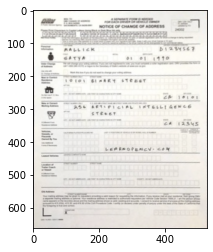

In [12]:
final = un_warped[:662, :528]

plt.imshow(final[:,:,::-1])
plt.show()